# "Work in Progress: Recreating Fast.ai Chapter 5 Using TensorFlow/Keras"
> "To test my understanding of the [Fast.ai course](https://course.fast.ai/) and to improve my TensorFlow/Keras skills, I am reimplementing chapters of the FastBook in TF/Keras."

- toc: true
- categories: [fastai, tensorflow, keras]

# WIP
This post is currently a **work in progress** and will be progressively updated as I work on it.
- Started: 7/21/21.
- Last updated: 7/23/21.

## TODO
- Normal data aug -> Presizing
- lr Finder
- 1cycle lr
- Discriminative lrs
- Confusion matrix, most confused
- Mixed precision
- Comparison to Fast.ai

# Image Classification

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import re

In [2]:
# Seed for reproducilbity
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

## From Dogs and Cats to Pet Breeds

Let's use `tf.data` API to create datasets. We could have used `tf.keras.preprocessing.image_dataset_from_directory`, but that would have required us to change our file structure where our images are, which I don't really want to do because the Fast.ai lessons depend on it having that file structure.

### Getting Files and Class Codes(?)

In [3]:
path = Path("/home/brandon/.fastai/data/oxford-iiit-pet/images/")

In [4]:
files = list(path.glob(r"*.jpg")); len(files), files[:5]

(7390,
 [PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/Birman_115.jpg'),
  PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/leonberger_142.jpg'),
  PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/Bombay_68.jpg'),
  PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/japanese_chin_26.jpg'),
  PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/saint_bernard_149.jpg')])

Let's shuffle our images now too to make them easier to split into train and val sets later.

In [5]:
np.random.shuffle(files)  # performed in-place

In [6]:
files[:5]

[PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_47.jpg'),
 PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/german_shorthaired_6.jpg'),
 PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/chihuahua_167.jpg'),
 PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/german_shorthaired_13.jpg'),
 PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images/beagle_47.jpg')]

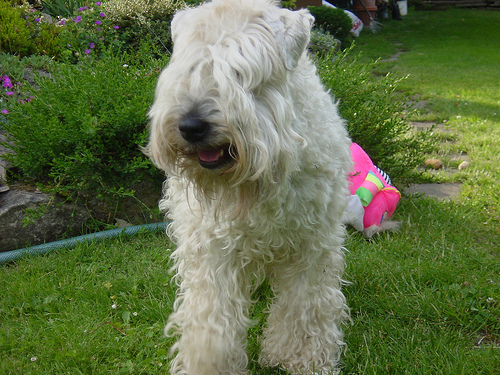

In [7]:
Image.open(files[0])

In [8]:
lbls = [re.findall(f"^(.+)_\d+$", f.stem)[0] for f in files]; len(lbls), lbls[:5]

(7390,
 ['wheaten_terrier',
  'german_shorthaired',
  'chihuahua',
  'german_shorthaired',
  'beagle'])

In [9]:
vocab = {name: i for i, name in enumerate(sorted(set(lbls)))}; vocab

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [10]:
encoded_lbls = list(map(vocab.get, lbls)); len(encoded_lbls), encoded_lbls[:5]

(7390, [35, 20, 17, 20, 15])

Awesome, now we're ready to create out `tf.data.Dataset`. We have to convert `Path` objects to strings. This part was analogous to the `get_items` and `get_x` and `get_y` arguments to fastai's `DataBlock`.

In [11]:
data = tf.data.Dataset.from_tensor_slices((list(map(str, files)), encoded_lbls)); data, next(iter(data))

(<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>,
 (<tf.Tensor: shape=(), dtype=string, numpy=b'/home/brandon/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_47.jpg'>,
  <tf.Tensor: shape=(), dtype=int32, numpy=35>))

### Splitting into Train and Val

Since our examples are shuffled randomly, we can just take the first 20% of images to be the validation set. The final 80% will be the train set.

In [24]:
num_val = int(len(data) * 0.2)  # 20% for validation set
train_ds, val_ds = data.skip(num_val), data.take(num_val)
len(train_ds), len(val_ds)

(5912, 1478)

In [25]:
# sanity checks
assert len(train_ds) + len(val_ds) == len(data)  # Check no examples were lost
assert not set(f.numpy() for f,lbl in train_ds) & set(f.numpy() for f,lbl in val_ds)  # check that sets are disjoint

### Transform our independent and dependent variables into something we can feed into model

Now we transform our data into something we can feed into our model. This part is analogous to the `DataBlock` API's `item_tfms` and `batch_tfms`. It also will do the role of creating a `DataLoader`. In TensorFlow, there are not separate `Dataset` and `DataLoader` abstractions, your `tf.data.Dataset` object does it all :).

#### Transforms

In [50]:
path

PosixPath('/home/brandon/.fastai/data/oxford-iiit-pet/images')

Actually, let's try using `tf.keras.preprocessing.image_dataset_from_directory` instead...

#### Batching

## Presizing

### Checking and Debugging a DataBlock

## Cross-Entropy Loss

### Viewing Activations and Labels

### Softmax

### Log Likelihood

### Taking the Log

## Model Interpretation

## Improving Our Model

### The Learning Rate Finder

### Unfreezing and Transfer Learning

### Discriminative Learning Rates

### Selecting the Number of Epochs

### Deeper Architectures